In [4]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

In [13]:
def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

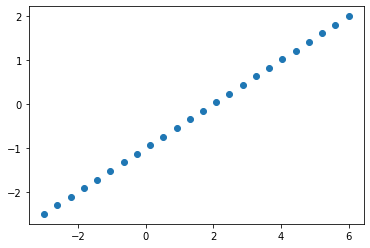

In [14]:
xleft = -3
xright = 6
n = 24
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))
yf = -1. + 0.5*x
plt.plot (x,yf, 'o')

In [15]:
def r(pha, y):
    return abs(pha - y)


def SqLeastRegMy1(x, y, m, alpha):
    global G, Phi
    
    n = len(x)
    
    Phi = np.zeros ((n,m+1))
    
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    
    PhiT = Phi.T
    
    a = np.linalg.solve(PhiT @ Phi, PhiT @ y)
    
    eps = 0.001
    
    for i in range(0, 10):
        
        a_i = a
        
        R = np.zeros((n, n))
        
        for j in (0, n - 1):
            R[j, j] = r((Phi @ a_i)[j], y[j]) / ((Phi @ a_i)[j] - y[j])**2

        
        a = np.linalg.solve(PhiT @ R @ Phi, PhiT @ R @ y)
        e = a - a_i
        epsit = (sum(e**2))**0.5/len(e)
        
        print ('iteration', i, a, np.sign(a), epsit)
        
        if (epsit <= eps):
            break
         
    return a

In [16]:
m = 1

PolynomCoefs = SqLeastRegMy1 (x, y, m, 1)
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

iteration 0 [nan nan] [nan nan] nan
iteration 1 [nan nan] [nan nan] nan
iteration 2 [nan nan] [nan nan] nan
iteration 3 [nan nan] [nan nan] nan
iteration 4 [nan nan] [nan nan] nan
iteration 5 [nan nan] [nan nan] nan
iteration 6 [nan nan] [nan nan] nan
iteration 7 [nan nan] [nan nan] nan
iteration 8 [nan nan] [nan nan] nan
iteration 9 [nan nan] [nan nan] nan
Коэффициенты [nan nan]


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sign


NameError: name 'G' is not defined